# Task 1 
#### Chitransh Tarsoliya

## **Regression with Python Scikit Learn**
In this section we will see how the Python Scikit-Learn library for machine learning can be used to implement regression functions. We will start with simple linear regression involving two variables.

### **Simple Linear Regression**
In this regression task we will predict the percentage of marks that a student is expected to score based upon the number of hours they studied. This is a simple linear regression task as it involves just two variables.

### Step 1 imporing and set-up


> import pandas as pd

pandas load data as data feame and allow to praform some basic operation on data

> import numpy as np  

numpy has all the importent functions for array
> import matplotlib.pyplot as plt  

matplotlib used to plot graphs
> %matplotlib inline

this line of code allows matplotlib to draw graps in notebook

> from sklearn.model_selection import train_test_split  

train_test_split split traning data training ans testing part

> from sklearn.linear_model import LinearRegression  

LinearRegression is an ready to use linear model 
> from sklearn import metrics  

metrics helps use to evalute the models



In [42]:
# Importing all libraries required in this notebook
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  
from sklearn.model_selection import train_test_split  
from sklearn.linear_model import LinearRegression
from sklearn import metrics  

%matplotlib inline

### Loading Data



In [43]:
# Reading data from remote link
url = "http://bit.ly/w-data"
# reading data drom link and store in df as data frame
df = pd.read_csv(url)
print("Data imported successfully")
# displaying top 10 row of data frame
df.head(10)

Data imported successfully


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [44]:
df.shape

(25, 2)

this dataframe has 25 entries

In [45]:
df.isnull().sum()

Hours     0
Scores    0
dtype: int64

dataframe dosent have ant null values ie we are good to go.

Let's plot our data points on 2-D graph to eyeball our dataset and see if we can manually find any relationship between the data. We can create the plot with the following script:

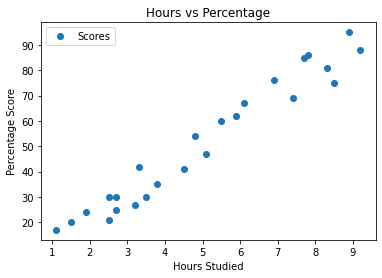

In [46]:
# Plotting the distribution of scores
df.plot(x='Hours', y='Scores', style='o')  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

**From the graph above, we can clearly see that there is a positive linear relation between the number of hours studied and percentage of score.**

### **Preparing the data**

The next step is to divide the data into "attributes" (inputs) and "labels" (outputs).

In [47]:
X = df.Hours.values   # Input attributes
y = df.Scores.values  # target vlaue  output value

print(X.shape, y.shape)



(25,) (25,)


df should be present in form of input :(len of data set, no of input attributes) ; output : (len of data set, no of output attributes)
     
in out case input and attributes both are one.

In [48]:
L = len(df)
inp = 1
out = 1

X = X.reshape(L, inp)
y = y.reshape(L, out)

Now that we have our attributes and labels, the next step is to split this data into training and test sets. We'll do this by using Scikit-Learn's built-in train_test_split() method:

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                            test_size=0.2, random_state=0) 
# spliting data as such 20% of data will be in test set and 80% persent of data will be present in tranining set

### **Training the Algorithm**
We have split our data into training and testing sets, and now is finally the time to train our algorithm. 

In [50]:
regressor = LinearRegression()  
regressor.fit(X_train, y_train) 

print("Training complete.")

Training complete.


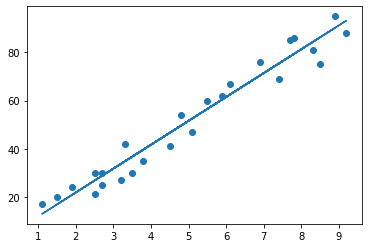

In [51]:
# Plotting the regression line
line = regressor.coef_*X+regressor.intercept_

# Plotting for the test data
plt.scatter(X, y)
plt.plot(X, line);
plt.show()

### **Making Predictions**
Now that we have trained our algorithm, it's time to make some predictions.

In [52]:
print(X_test) # Testing data - In Hours
y_pred = regressor.predict(X_test) # Predicting the scores

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


### **Evaluating the model**

The final step is to evaluate the performance of algorithm. This step is particularly important to compare how well different algorithms perform on a particular dataset. For simplicity here, we have chosen the mean square error. There are many such metrics.

In [54]:
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(y_test, y_pred)) 

Mean Absolute Error: 4.183859899002975


c:\users\chitrash\appdata\local\programs\python\python37\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

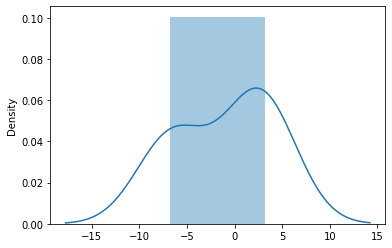

In [57]:
from seaborn import distplot as dist
dist(y_test-y_pred)

Lets try some other models 

In [62]:
from sklearn.linear_model import Ridge
ridge_regressor=Ridge()
ridge_regressor.fit(X_train,y_train)

Ridge()

In [63]:
y_pred = ridge_regressor.predict(X_test) # Predicting the scores
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(y_test, y_pred)) 

Mean Absolute Error: 4.0893423672211195


In [64]:
from sklearn.linear_model import Lasso
lasso_regressor=Lasso()
lasso_regressor.fit(X_train,y_train)

Lasso()

In [72]:
y_pred = lasso_regressor.predict(X_test) # Predicting the scores
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(y_test, y_pred)) 

Mean Absolute Error: 3.9915771073417106


In [75]:
# You can also test with your own data
hours = [[9.25]]
own_pred = regressor.predict(hours)
ridge_own_pred = ridge_regressor.predict(hours)
lasso_own_pred = lasso_regressor.predict(hours)
print("No of Hours = {}".format(hours[0][0]))
print("Linear Predicted Score  = {}".format(own_pred[0][0]))
print("ridge Predicted Score  = {}".format(ridge_own_pred[0][0]))
print("lasso Predicted Score  = {}".format(lasso_own_pred[0]))

No of Hours = 9.25
Linear Predicted Score  = 93.69173248737535
ridge Predicted Score  = 93.37269603750562
lasso Predicted Score  = 93.04269713841774
